**Introduction**

***Libraries***

In [89]:
# Importing libraries
import tensorflow as tf
import numpy as np
import pickle
import json
import librosa
import librosa.display
import math
import audio_to_spectrogram as ats

from keras.metrics import Accuracy, Precision, Recall, F1Score
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from os.path import exists
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Plotting
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

**Preprocessing**

Librosa --> split audio file into multiple spectrograms
(potentially) Krisp --> noise reductions

(22050,)(22050,)(22050,)(22050,)

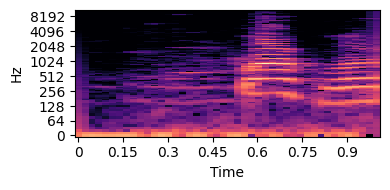

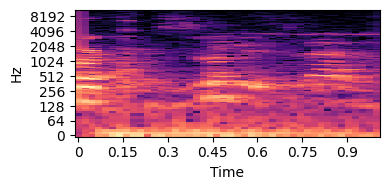

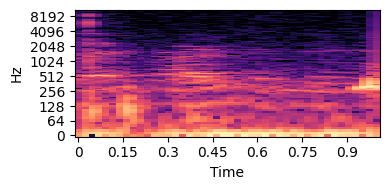

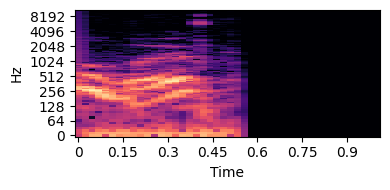

In [90]:
audio_file = './Data/Sample (Work work).wav'
spect = ats.audio_to_spectrograms(audio_file, timestep=1)

**Model**

In [91]:
num_layers = 10 #including input and output layers
input_neurons = 32
start_neurons = 64
end_neurons = 512


# Builds the crnn model
def build_crnn(input_shape, num_classes):
    # Convolutional layers
    model = models.Sequential()

    neurons_per_layer = calculate_neurons(num_layers - 2)
    print(neurons_per_layer)

    model.add(layers.Conv2D(input_neurons, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Creates x amount of hidden layers with the amount of requried neurons. Where x is num_layer - 2 (input and output)
    for i in range(num_layers - 2):
        print("number of neurons for hidden layer ", i + 1 , ":", neurons_per_layer[i])
        model.add(layers.Conv2D(neurons_per_layer[i], (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Recurrent layers
    model.add(layers.Reshape((-1, end_neurons)))
    model.add(layers.GRU(64, return_sequences=True))
    model.add(layers.GRU(64, return_sequences=False))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# calculate the number of neurons for each layer based on the start neurons, end neurons, and the number of layers.
def calculate_neurons(num_layers):
    # Calculate the step size for incrementing neurons
    step_size = (end_neurons - start_neurons) / (num_layers - 1)
    
    # Initialize list to store neuron counts for each layer
    neurons_per_layer = []
    
    # Iterate over each layer and calculate the neuron count
    for i in range(num_layers):
        neurons = int(start_neurons + i * step_size)
        neurons_per_layer.append(neurons)
    
    return neurons_per_layer

In [92]:
# Example usage
input_shape = (128, 128, 1)  # Example input shape (specify your own)
num_classes = 10  # Example number of output classes
crnn_model = build_crnn(input_shape, num_classes)
crnn_model.summary()



[64, 128, 192, 256, 320, 384, 448, 512]

number of neurons for hidden layer  1 : 64
number of neurons for hidden layer  2 : 128
number of neurons for hidden layer  3 : 192
number of neurons for hidden layer  4 : 256
number of neurons for hidden layer  5 : 320
number of neurons for hidden layer  6 : 384
number of neurons for hidden layer  7 : 448
number of neurons for hidden layer  8 : 512
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                           